# Assignment 3
#### By Aravind Kannan Rathinasabapathi

## 1. Download the Dataset

https://drive.google.com/file/d/1xkynpL15pt6KT3YSlDimu4A5iRU9qYck/view

In [1]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Image Augmentation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
datagen = ImageDataGenerator(rescale = 1.0/225, zoom_range = 0.2, horizontal_flip = True, vertical_flip = False, validation_split = 0.25)

In [4]:
x_train = datagen.flow_from_directory('./flowers',target_size=(224,224),class_mode='categorical',subset='training')

Found 3238 images belonging to 5 classes.


In [5]:
x_test = datagen.flow_from_directory('./flowers',target_size=(224,224),class_mode='categorical',subset='validation')

Found 1079 images belonging to 5 classes.


In [6]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [7]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

## 3. Create Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [9]:
model = Sequential()

## 4. Add Layers (Convolution, Max Pooling, Flatten, Dense- (Hidden Layers), Output) 

In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [14]:
model.add(Dense(5,activation='softmax'))

## 5. Compile the model

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## 6. Fit the model

In [16]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=15)

C:\Users\DEEPU\AppData\Local\Temp\ipykernel_13676\1218856371.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=15)


Epoch 1/15
102/102 [==============================] - 306s 3s/step - loss: 5.3039 - accuracy: 0.4280 - val_loss: 1.2356 - val_accuracy: 0.5153
Epoch 2/15
102/102 [==============================] - 226s 2s/step - loss: 1.1307 - accuracy: 0.5652 - val_loss: 1.1652 - val_accuracy: 0.5653
Epoch 3/15
102/102 [==============================] - 186s 2s/step - loss: 1.0024 - accuracy: 0.6149 - val_loss: 1.1308 - val_accuracy: 0.5774
Epoch 4/15
102/102 [==============================] - 186s 2s/step - loss: 0.9101 - accuracy: 0.6609 - val_loss: 1.0797 - val_accuracy: 0.6052
Epoch 5/15
102/102 [==============================] - 191s 2s/step - loss: 0.8637 - accuracy: 0.6702 - val_loss: 1.0456 - val_accuracy: 0.5950
Epoch 6/15
102/102 [==============================] - 194s 2s/step - loss: 0.7961 - accuracy: 0.6964 - val_loss: 1.0749 - val_accuracy: 0.6135
Epoch 7/15
102/102 [==============================] - 194s 2s/step - loss: 0.7447 - accuracy: 0.7202 - val_loss: 0.9956 - val_accuracy: 0.6386

## 7. Save the model

In [17]:
model.save('flowers.h5')

## 8. Test the model

### Test 1

In [18]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
model = load_model('flowers.h5')

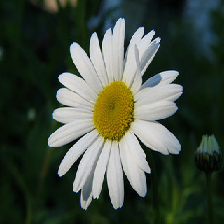

In [20]:
img = image.load_img('./flowers/daisy/2521408074_e6f86daf21_n.jpg',target_size=(224,224))
img

In [21]:
x = image.img_to_array(img)
x

array([[[ 9., 21.,  7.],
        [10., 22.,  8.],
        [10., 24.,  9.],
        ...,
        [23., 42., 36.],
        [18., 38., 29.],
        [18., 38., 27.]],

       [[ 8., 20.,  6.],
        [10., 22.,  8.],
        [10., 24., 11.],
        ...,
        [24., 43., 37.],
        [19., 39., 30.],
        [17., 37., 28.]],

       [[ 7., 19.,  5.],
        [ 9., 21.,  7.],
        [10., 24., 11.],
        ...,
        [25., 44., 40.],
        [20., 39., 35.],
        [18., 37., 33.]],

       ...,

       [[12., 23.,  6.],
        [11., 22.,  6.],
        [11., 22.,  6.],
        ...,
        [ 9., 24.,  5.],
        [ 9., 24.,  5.],
        [ 9., 24.,  5.]],

       [[11., 22.,  5.],
        [10., 21.,  5.],
        [10., 21.,  7.],
        ...,
        [10., 23.,  5.],
        [10., 23.,  5.],
        [10., 23.,  5.]],

       [[13., 21.,  6.],
        [12., 20.,  5.],
        [11., 19.,  6.],
        ...,
        [10., 23.,  5.],
        [11., 24.,  6.],
        [11., 24.,  6.]]

In [22]:
x = np.expand_dims(x, axis=0)
x

array([[[[ 9., 21.,  7.],
         [10., 22.,  8.],
         [10., 24.,  9.],
         ...,
         [23., 42., 36.],
         [18., 38., 29.],
         [18., 38., 27.]],

        [[ 8., 20.,  6.],
         [10., 22.,  8.],
         [10., 24., 11.],
         ...,
         [24., 43., 37.],
         [19., 39., 30.],
         [17., 37., 28.]],

        [[ 7., 19.,  5.],
         [ 9., 21.,  7.],
         [10., 24., 11.],
         ...,
         [25., 44., 40.],
         [20., 39., 35.],
         [18., 37., 33.]],

        ...,

        [[12., 23.,  6.],
         [11., 22.,  6.],
         [11., 22.,  6.],
         ...,
         [ 9., 24.,  5.],
         [ 9., 24.,  5.],
         [ 9., 24.,  5.]],

        [[11., 22.,  5.],
         [10., 21.,  5.],
         [10., 21.,  7.],
         ...,
         [10., 23.,  5.],
         [10., 23.,  5.],
         [10., 23.,  5.]],

        [[13., 21.,  6.],
         [12., 20.,  5.],
         [11., 19.,  6.],
         ...,
         [10., 23.,  5.],
        

In [23]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 10s 10s/step


array([0], dtype=int64)

In [24]:
index = ['Daisy','Dandelion','Rose','Sunflower','Tulip']

In [25]:
index[y[0]]

'Daisy'

### Test 2

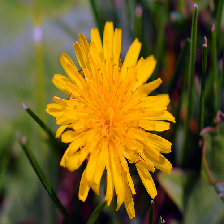

In [26]:
img = image.load_img('./flowers/dandelion/2495749544_679dc7ccef.jpg',target_size=(224,224))
img

In [27]:
x = image.img_to_array(img)

In [28]:
x = np.expand_dims(x, axis=0)

In [29]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 357ms/step


array([1], dtype=int64)

In [30]:
index[y[0]]

'Dandelion'

### Test 3

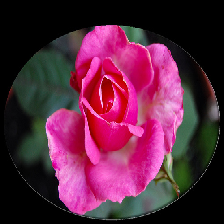

In [31]:
img = image.load_img('./flowers/rose/8050213579_48e1e7109f.jpg',target_size=(224,224))
img

In [32]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [33]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 499ms/step


array([2], dtype=int64)

In [34]:
index[y[0]]

'Rose'

### Test 4

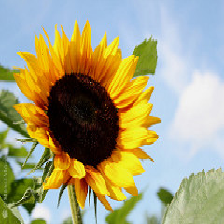

In [35]:
img = image.load_img('./flowers/sunflower/5933438337_b26a81ea81_n.jpg',target_size=(224,224))
img

In [36]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [37]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 404ms/step


array([3], dtype=int64)

In [38]:
index[y[0]]

'Sunflower'

### Test 5

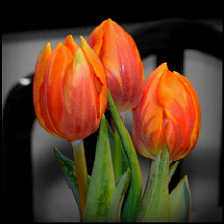

In [39]:
img = image.load_img('./flowers/tulip/2785458179_9130812eef_m.jpg',target_size=(224,224))
img

In [40]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [41]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 354ms/step


array([4], dtype=int64)

In [42]:
index[y[0]]

'Tulip'